In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('People_Covered_in_the_News/people_2014.csv')

In [33]:
def custom_standardization(df):

    spec_chars = ["!",'"',"#","%","&","'","(",")", "*","+",",",
                  "-",".","/",":",";","<", "=",">","?","@","[",
                  "\\","]","^","_", "`","{","|","}","~","–", 
                  "\xc2", "\xa0", "\x80", "\x9c", "\x99", "\x94", 
                  "\xad", "\xe2", "\x9d", "\n", "x9d", "xc2", "xa0", "x80", "x9c", "x99", "x94", 
                  "xad", "xe2", "n"]

    for char in spec_chars:
        df['article'] = df['article'].str.strip()
        #data['text'] = str(data['text']).lower()
        df['article'] = df['article'].str.replace(char, ' ')
        #data['text'] = stemmer.stem(str(data['text']))
        
    return df

In [34]:
data = custom_standardization(data)
data = data[data['race'] == 'black']

In [35]:
#1103 in data.index

In [36]:
len(black_df.index)

671

In [37]:
black_df = data[data['race'] == 'black']
names_list = black_df['last_name'].tolist()
names_list = list(set(names_list))
for i in range(len(names_list)):
    names_list[i] = names_list[i].lower()

In [38]:
names_list

['kaboom',
 'afanasiw',
 'khalid',
 'alam',
 'bulawayo',
 'mohammed',
 'mahony',
 'dacruz',
 'alfred',
 'damata',
 'mugar',
 'houdini',
 'zahir',
 'melanie',
 'hassan',
 'azulay',
 'xa0',
 'shaheen',
 'dibiase',
 'dbar',
 'macafee',
 'kadis',
 'emmanuel',
 'lukas',
 'kalweit',
 'hailo',
 'academie',
 'mohamed',
 'at',
 'saraf',
 'facebook',
 'bohane',
 'bussgang',
 'abigail',
 'sophia',
 'dangora',
 'essaibi',
 'katie',
 'isango',
 'amjad',
 'harpo',
 'eminem',
 'muhammad',
 'khan',
 'azimi',
 'kamande',
 'rabidou',
 'amy',
 'aduba',
 'al',
 'ishkanian',
 'nwachukwu',
 'tahsir',
 'faaruuq',
 'al',
 'hashem',
 'osgood',
 'nduaguba',
 'nsloane',
 'nseptember',
 'yusef',
 'oyaronbi',
 'chezulu',
 'keisha',
 'islam',
 'khokhlan',
 'yous',
 'aweh',
 'ashkouri',
 'idowu',
 'embiid',
 'alan',
 'chiofaro',
 'zakim',
 'naacp',
 'jared',
 'taj',
 'baza',
 'yomlingo',
 'massa',
 'cheetah',
 'amram',
 'elsa',
 'alpha',
 'orekoya',
 'kadish',
 'dimaiti',
 'nkennedy',
 'abel',
 'tmz',
 'idahor',
 'a

In [39]:
# turn DataFrame of articles into one big chunk of text
documents = ''

for ind in black_df.index:
    temp = black_df.loc[ind]['article']
    temp = temp.lower().split()
    for word in temp:
        documents = documents + ' ' + word
    #print(len(documents))

In [40]:
# just using the sentence, which words surround black names?
# use: https://peekaboo-vision.blogspot.com/2012/11/a-wordcloud-in-python.html
# http://amueller.github.io/word_cloud/
# don't need to run Word2Vec

# perhaps, 'black' race predictions are low, but not as low as it seems since coverage 
# might have to do with the general picture, not specific individuals

In [41]:
#from wordcloud import WordCloud

# Generate a word cloud image
#wordcloud = WordCloud().generate(documents)

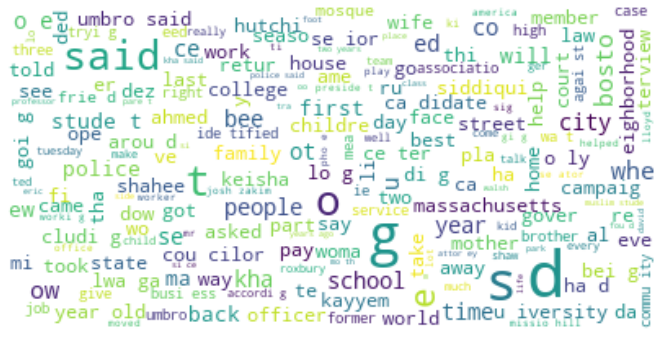

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# lower max_font_size
wordcloud = WordCloud(max_font_size=40, background_color='white').generate(documents)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.savefig('Black_Ents_Clouds/cloud_2014.png')
wordcloud.to_file('Black_Ents_Clouds/cloud_2014.png')
plt.show()

In [13]:
#plt.savefig('Black_Ents_Clouds/cloud_2014.png')

In [1]:
# wiki last name model has the highest F-1 score for black people
# I focused on F-1 score since we don't want to label people of other races as black, but we also don't want to miss out on black people
# I asked the journalism team to look at the results and share their insights, but they have been busy with other work
# We can either look at the data now, or I can just proceed with the wiki last name model
# and update the name + sentence + race dataset, the word clouds, as well as the list of unique black people covered (not stored yet)
# 
# change name in the sentence to some key/remove name from the sentence

In [ ]:
# take a look at the words surrounding people of different races for each year
# for example, group black people sentences, lemmatize sentences and create a word cloud
# parse the sentence using "dependency parser" (check out SpaCy dependency parser)
    # separate words into which race's person the words depend on/on which a given race's person depends in the sentence
    # person is subject vs person is object